In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#New by Daniel
#from sandbox.sandbox import KinectV2 as kinect
#from sandbox.sandbox import ArucoMarkers as marker
#import Sandbox as sb

Freenect module not found, KinectV1 will not work.


In [2]:
calib = sb.CalibrationData(file='my_calibration.json')

JSON configuration loaded.


In [3]:
kinect = sb.KinectV2(calib)

KinectV2 initialized.


In [4]:
marker = sb.ArucoMarkers(kinect)

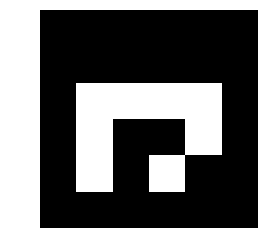

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
marker.create_aruco_marker(1,1,True)

In [7]:
marker.find_markers_ir(kinect,4)

Corners_IR_y Corners_IR_x
ids                          
6            390           95
11           115          100
2            119          434
1            391          436

In [8]:
marker.find_markers_rgb(kinect,4)

Corners_RGB_y Corners_RGB_x
ids                            
6            1037           534
11            237           543
2             234          1514
1            1032          1539

In [9]:
df=marker.update_dict_markers_current()

In [10]:
df.to_csv('pd_info.csv')

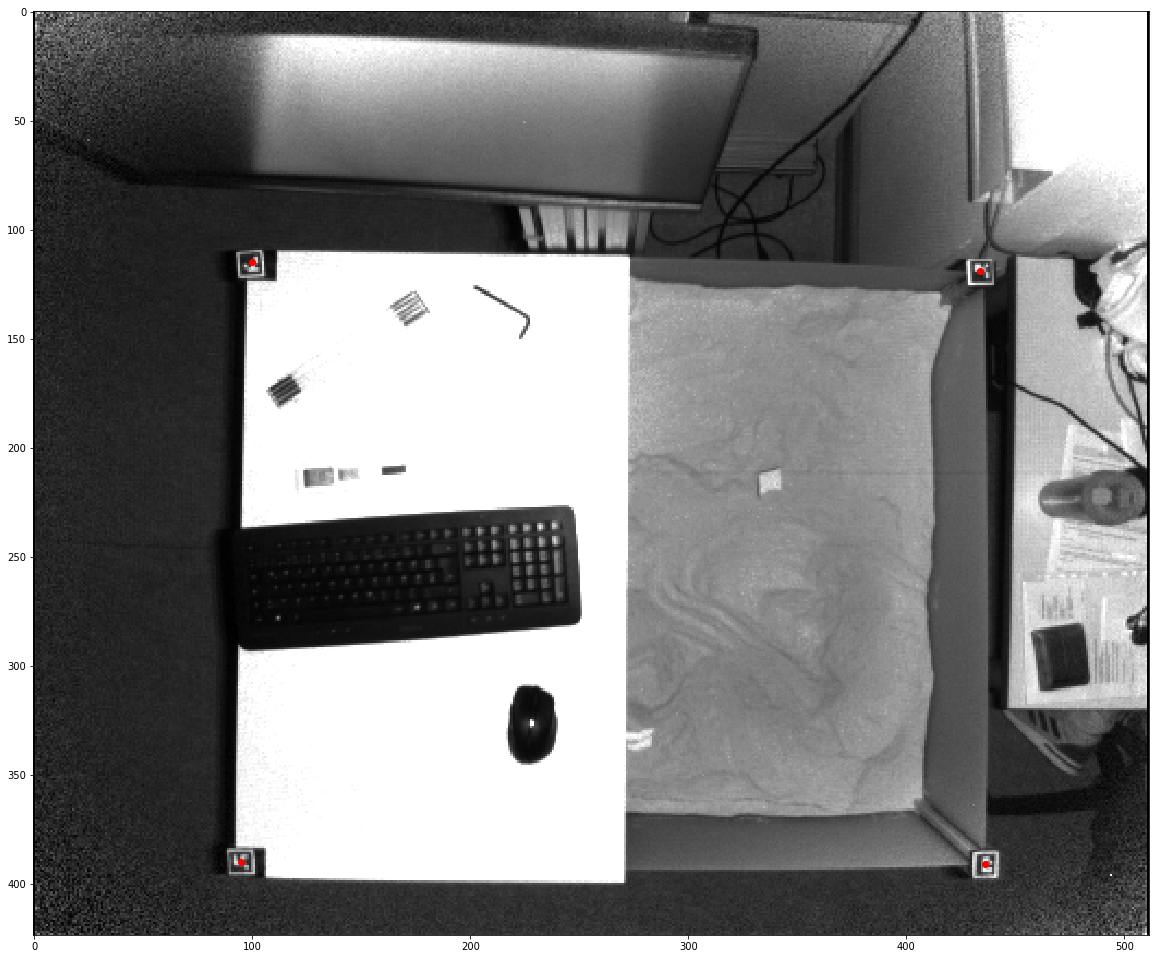

In [11]:
marker.plot_ir_aruco_location(kinect)

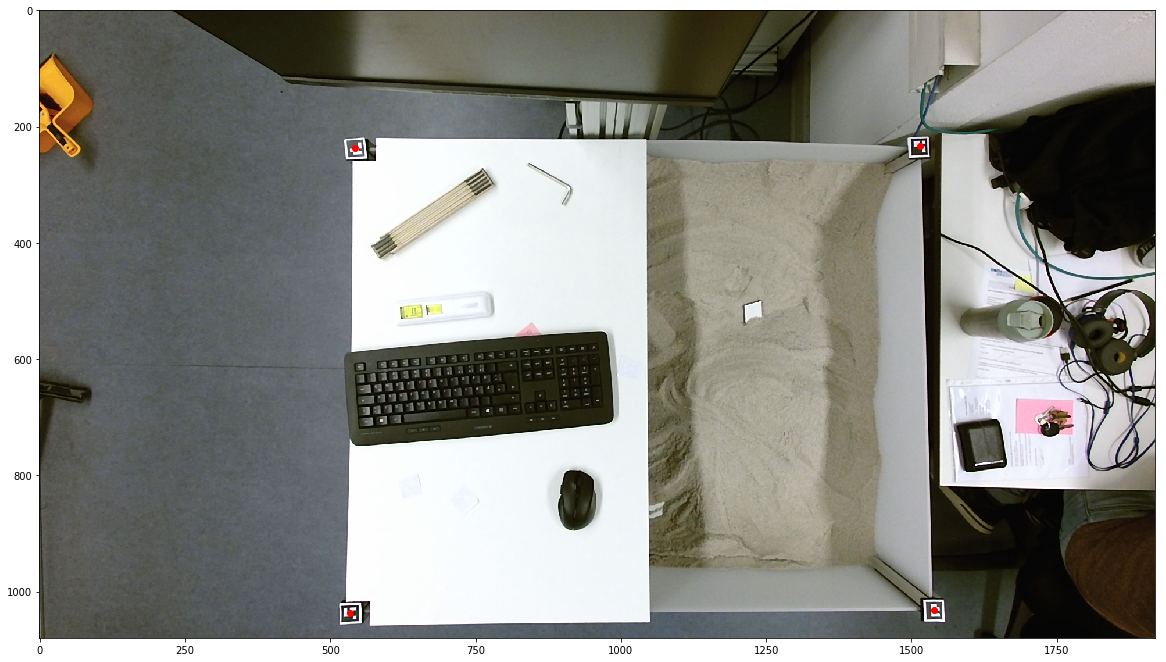

In [12]:
marker.plot_rgb_aruco_location(kinect)

In [15]:
marker.update_dict_markers_current()

Corners_IR_y Corners_IR_x Corners_RGB_y Corners_RGB_x
ids                                                      
6            390           95          1037           534
11           115          100           237           543
2            119          434           234          1514
1            391          436          1032          1539

In [14]:
marker.update_dict_markers_all()

Empty DataFrame
Columns: [Corners_IR_y, Corners_IR_x, Corners_RGB_y, Corners_RGB_x]
Index: []

In [14]:
drop=df[df.isna().any(1)]
drop

Corners_IR_y Corners_IR_x Corners_RGB_y Corners_RGB_x
ids                                                      
6            NaN          NaN           953           733
12           244          259           NaN           NaN
34           NaN          NaN           860           716

In [17]:
marker.change_point_RGB_to_DepthIR()

ValueError: setting an array element with a sequence.

In [ ]:
marker.erase_dict_markers_all()

In [ ]:
marker.dict_markers_current

(1080, 1920, 3) (424, 512)


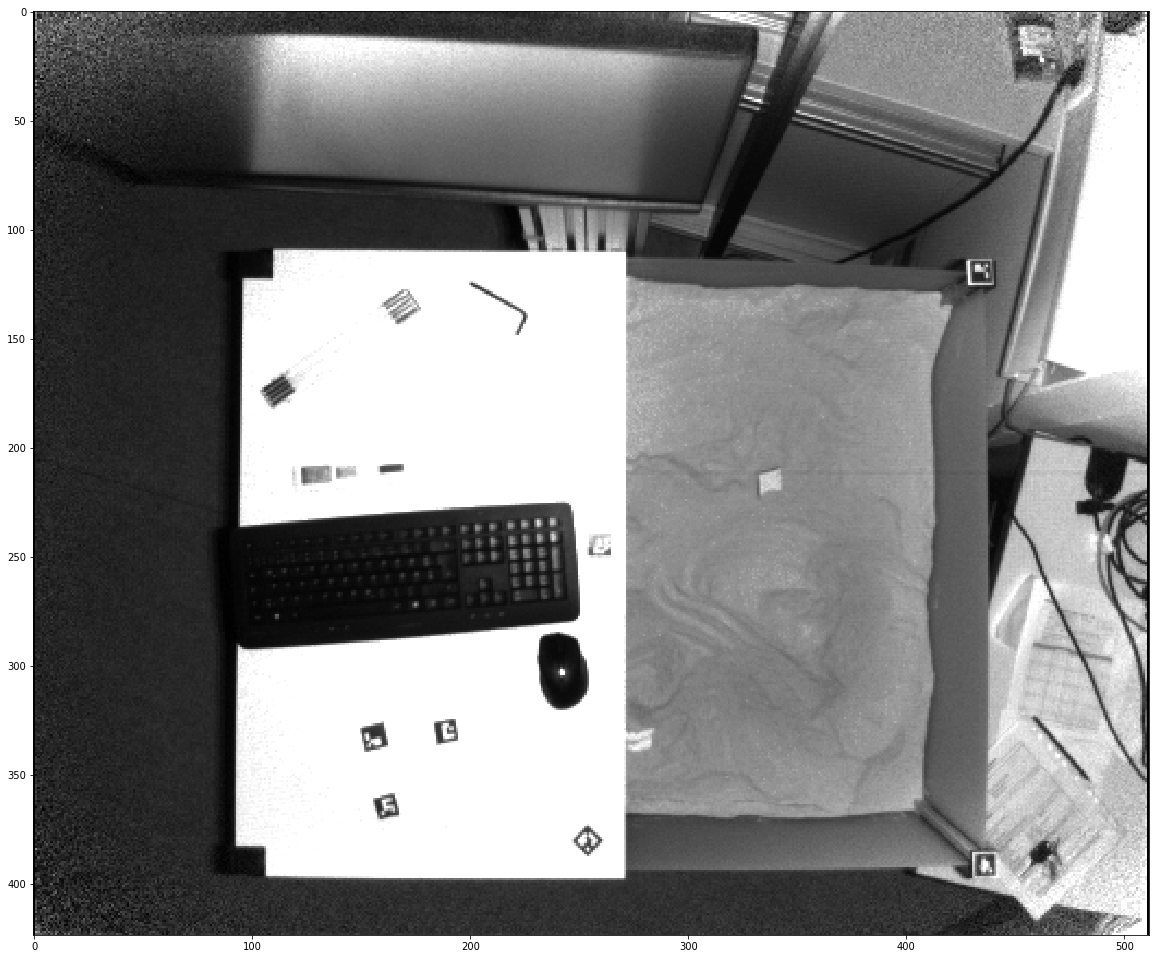

In [41]:

print(kinect.get_color().shape,kinect.get_frame().shape)
a=kinect.get_color()
b=np.flipud(kinect.get_frame())
c=(kinect.get_ir_frame())

"""plt.figure()
plt.subplot(1,3,1)
plt.imshow(a)
plt.subplot(1,3,2)
plt.imshow(b)
plt.subplot
1,3,3)"""
plt.figure(figsize=(20,20))
plt.imshow(c,cmap='gray')

In [ ]:
np.save('color.npy',a)
np.save('depth.npy',b)
np.save('IR.npy',c)

In [ ]:
pos=c[5,10]


In [ ]:
pos.shape

In [20]:
sb.PyKinectRuntime.PyKinectRuntime

pykinect2.PyKinectRuntime.PyKinectRuntime

In [76]:
kinect.get_mapped(pos)

AttributeError: 'KinectV2' object has no attribute 'get_mapped'

In [93]:
kinect.get_color().shape

(1080, 1920, 3)

In [21]:
kinect.kinect._mapper.MapColorFrameToDepthSpace(np.array(drop[["Corners_RGB_x", "Corners_RGB_y"]]).astype(np.int16))

AttributeError: 'KinectV2' object has no attribute 'kinect'

In [97]:
import ctypes

In [100]:
x=kinect.get_color()
kinect.kinect._mapper.MapColorFrameToDepthSpace(depthFrameData=x.ctypes.data_as(ctypes.POINTER(ctypes.c_ushort)) , depthPointCount=(1080*1920),depthDataPointCount=1,depthSpacePoints=kinect.get_frame())

ArgumentError: argument 4: <class 'TypeError'>: expected LP__DepthSpacePoint instance instead of numpy.ndarray

In [72]:
np.array(drop[["Corners_RGB_x", "Corners_RGB_y"]]).astype(np.int16)

array([[1610,  462]], dtype=int16)

In [187]:
kinect.device._mapper.MapCameraPointsToDepthSpace(cameraPointCount=(0,0,0),cameraPoints=(120,120))



TypeError: required argument 'depthPointCount' missing

In [ ]:
ir=kinect.kinect.get_last_infrared_frame()
ir=ir.reshape((424, 512))
plt.pcolormesh(ir, cmap='binary_r',vmin=0,  vmax=5000)


In [22]:

plt.rcParams['figure.figsize'] = [512/30,424/30]

In [23]:
kinect.kinect._depth_frame_data_type

AttributeError: 'KinectV2' object has no attribute 'kinect'

In [150]:
CSP_Count=kinect.kinect._depth_frame_data_capacity 
CSP_type= kinect.kinect._depth_frame_data_type
#CSP=ctypes.cast(CSP_type(), ctypes.POINTER(_ColorSpacePoint))
CSP=kinect.kinect._depth_frame_data
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.kinect._depth_frame_data_capacity,kinect.kinect._depth_frame_data, CSP_Count, CSP)

ArgumentError: argument 4: <class 'TypeError'>: expected LP__DepthSpacePoint instance instead of LP_c_ushort

In [24]:
import pykinect2


In [205]:
a = kinect.kinect._mapper.MapCameraPointToDepthSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1))
np.asarray(a)

array((440.88184, 96.45807), dtype=[('x', '<f4'), ('y', '<f4')])

In [211]:
np.asarray(pykinect2.PyKinectV2._DepthSpacePoint(0, 0))

array((0., 0.), dtype=[('x', '<f4'), ('y', '<f4')])

In [212]:
np.asarray(DFD)

ValueError: '&<H' is not a valid PEP 3118 buffer format string

c_ushort(0)

In [218]:
DFD

In [215]:
DFD=kinect.kinect._depth_frame_data
DDPC=kinect.kinect._depth_frame_data_capacity
DDPTC=kinect.kinect._depth_frame_data_type
kinect.kinect._mapper.MapColorFrameToDepthSpace()

TypeError: required argument 'depthDataPointCount' missing

In [210]:
(depthFrameData=DFD, depthDataPointCount = DDPC,
                                                depthPointCount = DDPC, depthSpacePoints=pykinect2.PyKinectV2._DepthSpacePoint(0, 0))

COMError: (-2147024809, 'The parameter is incorrect.', (None, None, None, 0, None))

In [182]:
%debug

> <ipython-input-174-24d967b30b9d>(1)<module>()
----> 1 kinect.kinect._mapper.MapCameraPointToDepthSpace(5)

ipdb> exit


In [160]:
kinect.kinect._mapper._ICoordinateMapper__com_MapColorFrameToDepthSpace()

TypeError: this function takes 4 arguments (0 given)

In [294]:
CSP_Count=kinect.kinect._depth_frame_data_capacity 
#CSP_Count
point=pykinect2.PyKinectV2._DepthSpacePoint
#point
CSP_type= point * CSP_Count.value
#CSP_type
CSP=ctypes.cast(CSP_type(), ctypes.POINTER(point))
#kinect.kinect._mapper.MapDepthFrameToColorSpace(CSP_Count,kinect.kinect._depth_frame_data, CSP_Count, CSP)
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.kinect._depth_frame_data_capacity,kinect.kinect._depth_frame_data, CSP_Count, CSP)

COMError: (-2147024809, 'The parameter is incorrect.', (None, None, None, 0, None))

In [295]:
CSP_type

__main__._DepthSpacePoint_Array_217088

In [226]:
dsp=pykinect2.PyKinectV2._DepthSpacePoint(1920*1080)

In [233]:
a = kinect.kinect._mapper.MapCameraPointsToDepthSpace(kinect.get_frame().size,kinect.get_frame(),)

TypeError: required argument 'depthPointCount' missing

In [239]:
a = kinect.kinect._mapper.MapCameraPointToDepthSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1))
np.asarray(a)

array((440.88184, 96.45807), dtype=[('x', '<f4'), ('y', '<f4')])

In [266]:
a = kinect.kinect._mapper.MapColorFrameToDepthSpace(depthFrameData=kinect.get_frame(),depthDataPointCount=dsp,depthPointCount=kinect.get_color().size,depthSpacePoints=dsp)

ArgumentError: argument 1: <class 'TypeError'>: wrong type

In [232]:
kinect.get_frame().size

217088

In [247]:
depthSpacePoint=np.resize(np.asarray(pykinect2.PyKinectV2._DepthSpacePoint),(1920,1080))

In [248]:
kinect.kinect._mapper.MapColorFrameToDepthSpace(kinect.get_frame(),depthSpacePoint)

TypeError: required argument 'depthPointCount' missing

In [264]:
god=pykinect2.PyKinectV2.ICoordinateMapper()
god.MapColorFrameToDepthSpace(kinect.get_frame().size,kinect.get_frame(),kinect.get_color().size)

TypeError: Expected a COM this pointer as first argument

In [292]:
god.MapColorFrameToDepthSpace(CSP_Count.value,np.ushort(kinect.get_frame()),CSP_Count)



TypeError: Expected a COM this pointer as first argument

In [285]:
a=kinect.get_frame()
ctypes.POINTER(ctypes.c_ushort)()

In [279]:
a.ctypes.POINTER(ctypes.c_ushort)

AttributeError: '_ctypes' object has no attribute 'POINTER'

In [282]:
ctypes.POINTER(ctypes.c_ushort)(a)

TypeError: expected c_ushort instead of numpy.ndarray

In [291]:
type(np.ushort(a))

numpy.ndarray

In [288]:
type(a)

numpy.ndarray

In [290]:
a

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 965, 958,   0],
       [  0,   0,   0, ..., 957, 955,   0],
       [  0,   0,   0, ..., 976, 932,   0]], dtype=uint16)

In [34]:
base=pykinect2.PyKinectRuntime.PyKinectRuntime.__init__

In [38]:
ctypes.POINTER(pykinect2.PyKinectV2.IKinectSensor())

NameError: name 'ctypes' is not defined

In [39]:
np.asarray(pykinect2.PyKinectV2._DepthSpacePoint(0, 0))

array((0., 0.), dtype=[('x', '<f4'), ('y', '<f4')])

In [46]:
kinect.device._mapper.GetDepthCameraIntrinsics()

In [47]:
yes=kinect.device._mapper

In [51]:
yes._ICoordinateMapper__com_MapDepthPointsToColorSpace

TypeError: this function takes 1 argument (0 given)

In [53]:
yes.MapColorFrameToCameraSpace()

TypeError: required argument 'depthDataPointCount' missing

In [65]:
DepthFrameData=kinect.get_frame()

In [68]:
ColorSpacePoints=np.resize(np.asarray(pykinect2.PyKinectV2._ColorSpacePoint),(1920,1080))

In [ ]:
CameraSpaceCount

In [69]:
yes.MapColorFrameToCameraSpace(DepthFrameData, ColorSpacePoints)

TypeError: required argument 'cameraPointCount' missing

In [62]:
print(depthSpacePoint)

(1920, 1080)


In [ ]:
pykinect2.PyKinectV2._

In [71]:
yes.GetDepthFrameToCameraSpaceTable(frame)

ArgumentError: argument 1: <class 'TypeError'>: expected LP_c_ulong instance instead of numpy.ndarray

In [72]:
kinect.device._frame_surface.get_width()

AttributeError: 'PyKinectRuntime' object has no attribute '_frame_surface'

In [87]:
ans=pykinect2.PyKinectRuntime._CameraIntrinsics()
ans

In [93]:
ans.PrincipalPointY

0.0

In [ ]:
a = kinect.kinect._mapper.MapCameraPointToDepthSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1))

In [95]:
np.asarray(yes.MapCameraPointToColorSpace(pykinect2.PyKinectV2._CameraSpacePoint(.5, .3, 1)))

array((1546.9734, 242.93784), dtype=[('x', '<f4'), ('y', '<f4')])

In [97]:
yes.MapColorFrameToCameraSpace()

TypeError: required argument 'depthDataPointCount' missing

In [96]:
yes.MapColorFrameToDepthSpace()

TypeError: required argument 'depthDataPointCount' missing

In [120]:
yes._ICoordinateMapper__com_MapColorFrameToCameraSpace()

TypeError: this function takes 4 arguments (0 given)

In [121]:
yes._ICoordinateMapper__com_MapCameraPointToColorSpace()

TypeError: this function takes 2 arguments (0 given)

In [137]:
kinect.device._depth_frame_data_type

c_ushort_Array_217088

In [140]:
kinect.device._depth_frame_data_capacity

c_ulong(217088)

In [209]:
depthDataPointCount = kinect.device._depth_frame_data_capacity.value

In [214]:
cameraPointCount = kinect.device._color_frame_data_capacity.value

In [219]:
depthFrameData = kinect.device._depth_frame_data

In [212]:
CameraSpacePoint = ctypes.cast(kinect.device._color_frame_data_type(), ctypes.POINTER(pykinect2.PyKinectV2._CameraSpacePoint))

In [213]:
cameraSpacePoints = yes.MapColorFrameToCameraSpace(depthDataPointCount = depthDataPointCount, 
                                                   depthFrameData = depthFrameData,
                                                   cameraPointCount = cameraPointCount,
                                                   cameraSpacePoints = CameraSpacePoint)

COMError: (-2147024809, 'The parameter is incorrect.', (None, None, None, 0, None))

In [225]:
kinect.device._sensor.DepthFrameSource

<POINTER(IDepthFrameSource) ptr=0x27de3747c50 at 27df470a9c8>

In [205]:
import ctypes

In [ ]:
CSP_Count=kinect._depth_frame_data_capacity 
CSP_type= _ColorSpacePoint * CSP_Count.value
CSP=ctypes.cast(CSP_type(), ctypes.POINTER(_ColorSpacePoint))
mapper.MapDepthFrameToColorSpace(kinect._depth_frame_data_capacity,kinect._depth_frame_data, CSP_Count, CSP)

In [ ]:
depthDataPointCount = kinect.device._depth_frame_data_capacity
pykinect2.PyKinectV2._ColorSpacePoint

In [201]:
type(pykinect2.PyKinectV2._ColorSpacePoint*depthDataPointCount)

TypeError: can't multiply sequence by non-int of type 'c_ulong'

In [203]:
kinect.device._color_frame_data_type()


In [206]:
ctypes.cast(kinect.device._color_frame_data_type(), ctypes.POINTER(pykinect2.PyKinectV2._ColorSpacePoint))

In [16]:
x = 390
y = 95

In [17]:
depthPoint = pykinect2.PyKinectV2._DepthSpacePoint(x,y)

NameError: name 'pykinect2' is not defined

In [ ]:
depth = kinect.get_frame()[x][y]

In [ ]:
ColorSpacePoint = yes.MapDepthPointToColorSpace(depthPoint = depthPoint, depth = depth)

In [ ]:
np.asarray(CameraSpacePoint.x)

In [18]:
int(ColorSpacePoint)

NameError: name 'ColorSpacePoint' is not defined

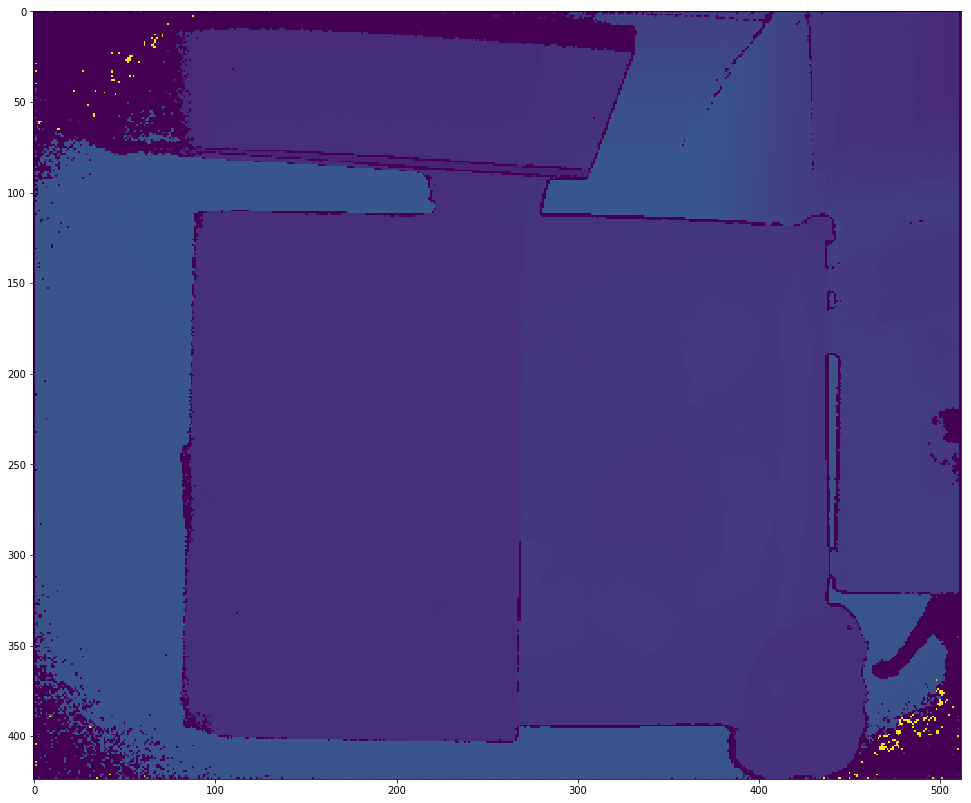

In [253]:
plt.imshow(np.flipud(kinect.get_frame()))

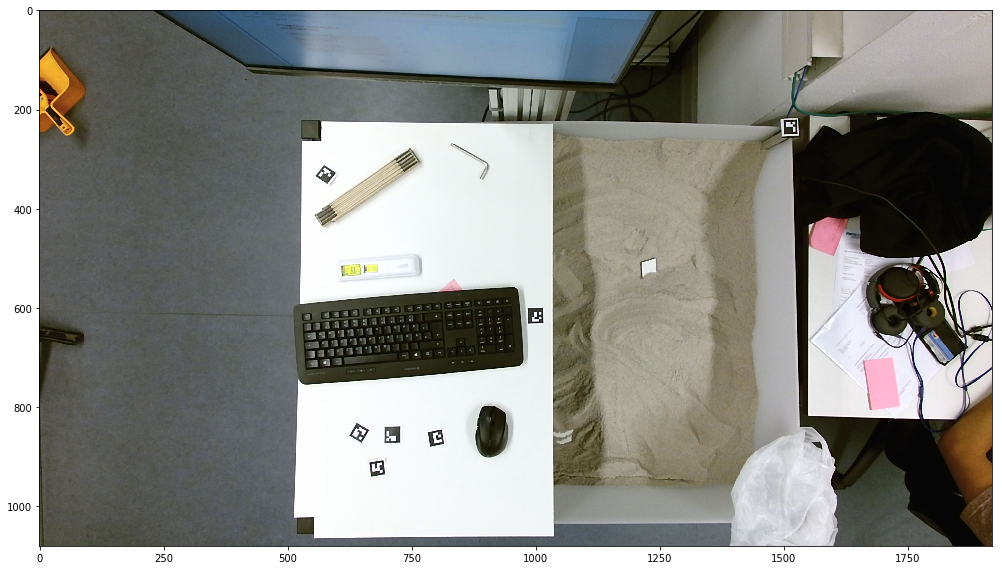

In [249]:
plt.imshow(kinect.get_color())

In [264]:
marker.find_markers_ir(kinect)

Corners_IR_y Corners_IR_x
ids                          
2            119          434
5            329          131
6            353          143
11           147          109

In [265]:
marker.find_markers_rgb(kinect)

Corners_RGB_y Corners_RGB_x
ids                            
5             851           644
6             922           681
1             862           798
11            330           577
2             235          1513

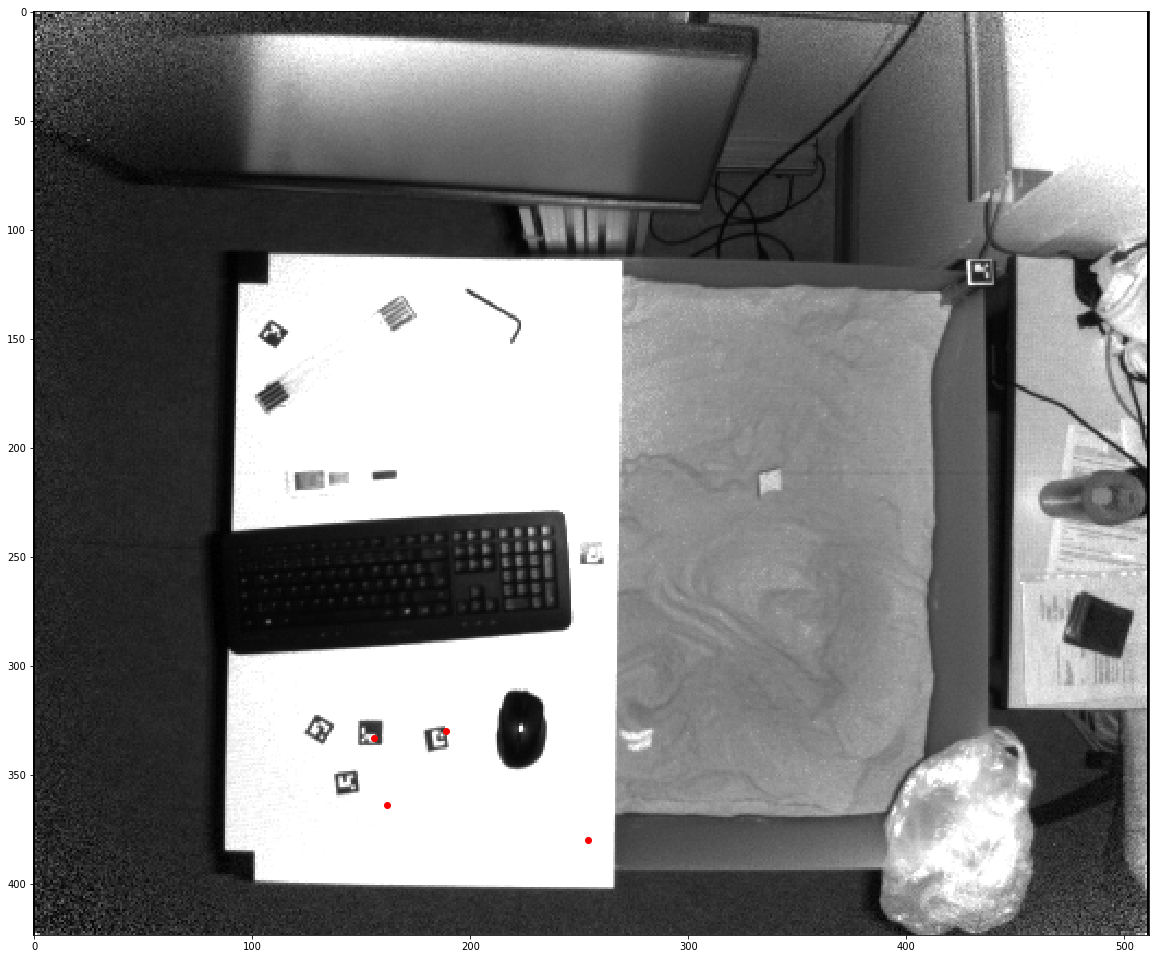

NameError: name 'img' is not defined

In [268]:
marker.plot_ir_aruco_location(kinect)

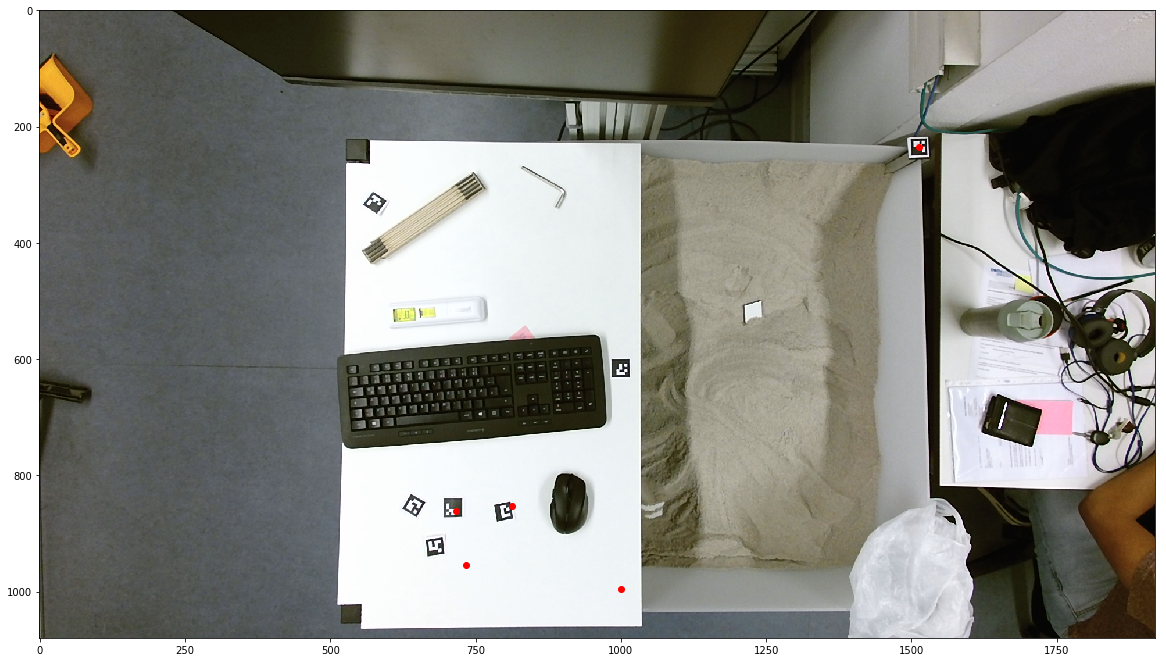

In [271]:
marker.plot_rgb_aruco_location(kinect)